In [5]:
from PIL import Image, ImageDraw
import numpy as np
import cv2
from glob import glob 
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output

# 원데이터 폴더 지정
main_path = 'C:\\Users\\woowo\\Downloads\\instance-level-human-parsing\\instance-level_human_parsing\\instance-level_human_parsing\\'

# 자신에게 할당된 숫자 입력
my_num = 0
n = my_num * 5550

masklist = sorted(glob(os.path.join(main_path,'Training\\Human\\*.png'))+glob(os.path.join(main_path,'Validation\\Human\\*.png')))[n:n+5550]
imlist = sorted(glob(os.path.join(main_path,'Training\\Images\\*.jpg'))+glob(os.path.join(main_path,'Validation\\Human\\*.png')))[n:n+5550]

In [6]:
def checkImageSave(idx):
    print(idx)
    _, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,10))

    imgpath = imlist[idx]
    maskpath = masklist[idx]
    filename = maskpath.split('\\')[-1]
    print(filename)
    ori_img = Image.open(imgpath)
    img = Image.open(maskpath)
    img = img.convert('RGB')
    img_ = img.copy()
    axes[0].imshow(img)

    image = cv2.imread(maskpath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    a,b = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    bb = np.where(b[0][:,-1]>-1)[0]
    try:
        for num in bb:
            aa = a[num]
            min_idx = aa[:,:,1].argmin()
            max_idx = aa[:,:,1].argmax()
            k = aa[min_idx]
            kk = aa[max_idx]

            target_pixel = (k[0][0],k[0][1]+1)
            color_pixel = (kk[0][0],kk[0][1]+1)
            target_color = tuple(np.array(img)[color_pixel[1], color_pixel[0]])
            ImageDraw.floodfill(img, target_pixel,  target_color)
    except:
        print('please input2 / error')
    print(imgpath)
    axes[1].imshow(img)
    axes[2].imshow(ori_img)
    plt.show()
    
    return img,img_,filename

In [7]:
num = 149
idx = num-1

154
0000189.png
C:\Users\woowo\Downloads\instance-level-human-parsing\instance-level_human_parsing\instance-level_human_parsing\Training\Images\0000189.jpg


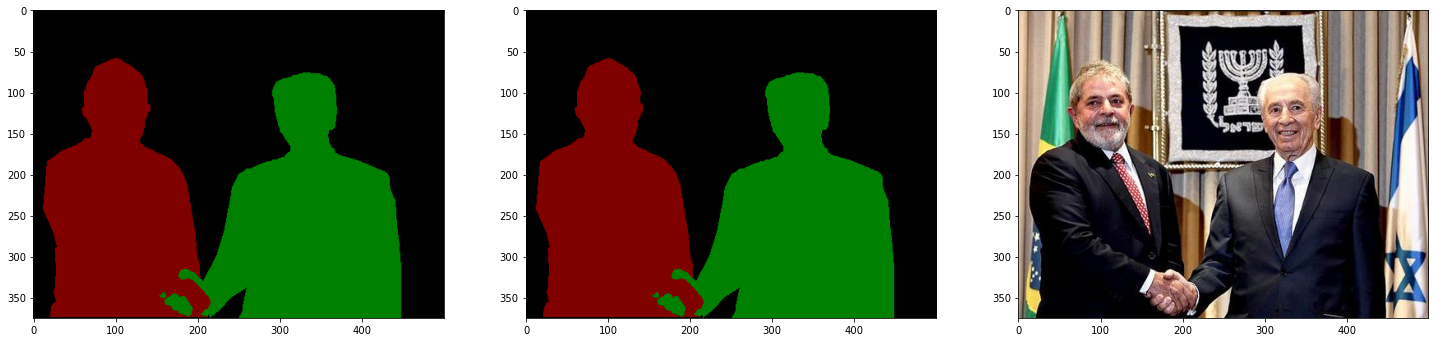

구멍이 채워진 이미지를 저장하려면 : 1 / 원본을 수정예정 폴더에 저장하려면 2 : 원본을 수정없이 저장하려면 3 을 입력해주세요4


In [8]:
while True:
    idx += 1 
    img, img_, filename = checkImageSave(idx)
    a = int(input('구멍이 채워진 이미지를 저장하려면 : 1 / 원본을 수정예정 폴더에 저장하려면 2 : 원본을 수정없이 저장하려면 3 을 입력해주세요'))
    if a == 2:
        img_.save(os.path.join(os.getcwd() , 'original_image',  filename) , 'PNG')
    elif a == 3:
        img_.save(os.path.join(os.getcwd() , 'modified_image',  filename) , 'PNG')
    elif a == 1:
        img.save(os.path.join(os.getcwd() , 'modified_image',  filename) , 'PNG')
    else :
        break
    clear_output()

In [9]:
print(idx)

154
